In [2]:
import pandas as pd

# 데이터 살펴보기

In [3]:
# 타이타닉 데이터를 담아올 변수를 선언합니다.
titanic = pd.read_csv('titanic.csv')

In [4]:
# 타이타닉 데이터를 살펴봅시다.
titanic
# 총 891개의 칼럼과 12개의 로우가 있습니다.
# 칼럼과 로우는 모두 0부터 시작하므로, 마지막 정보의 로우은 890인 것을 확인할 수 있습니다.
# 타이타닉에 탑승한 891명의 정보가 들어있습니다.
# series: 시리즈란, 데이터 프레임에서 한개의 열, 칼럼에 해당합니다.
# 중요한 시리즈 몇개를 살펴보고, 의미를 알아봅시다.
# survived에서 0은 사망, 1은 생존
# Pclass: 탑승석 1등석, 2등석, 3등석
# NaN은 Not a Number. 결측값을 의미합니다.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
# 타이타닉 정보를 요약하여 확인 가능
titanic.info()
# 데이터 프레임 자료형 확인 가능, 891개의 데이터 개수 확인 가능
# 결측값을 null, 널값이라고 부릅니다.
# 여기서는 해당 칼럼의 결측값이 아닌 값을 카운트해주는데, Cabin 칼럼에서 204 non-null은 204개의 값만이 채워져 있고
# 나머지는 결측 값이라는 뜻입니다.
# 그리고, 각 칼럼에 담긴 데이터의 자료형을 보여줍니다. 
# int64는 정수형, object는 문자형, float는 실수형...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 데이터 다듬기
## 1) 데이터 타입 변환

In [6]:
# 다음은 이 칼럼에 담긴 데이터들의 자료형을 변환해줍시다.
# Survived나 Pclass가 int로 되어있는데, 정수형 자료형은 주로 숫자 연산에 이용되어야 합니다. 즉, 이 숫자들을 덧셈,뺄셈,나눗셈,
# 곱셈했을 때 의미가 있어야 합니다.
# 그러나 Survived는 0은 사망, 1은 생존이라는 구분을 위한 것이고,
# PClass 역시 1,2,3 등석을 구분하는 것일 뿐, 연산을 해줘봤자 의미가 없으므로, 이들은 정수형이 아닌,
# 문자로 취급해주기 위해 object로 바꿔주는게 타당할 것으로 보입니다.
titanic["Survived"] = titanic["Survived"].astype(object)
titanic["Pclass"] = titanic["Pclass"].astype(object)

In [7]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 83.7+ KB


## 2) 결측치 확인
#### 결측값: null = NaN = na

In [8]:
# 각각의 값이 결측치인지 아닌지를 확인 가능
print(titanic.isnull())

     PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False  False  False  False   False   
889        False     False   False  False  False  False  False  False   False   
890        False     False   False  False  False  False  False  False   False   

      Fare  Cabin  Embarked

In [9]:
# 각 칼럼마다 결측치 수 총합을 알 수 있음
print(titanic.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [10]:
# Cabin이라는 칼럼은 전체 900개 가까이 되는 데이터 수에 비해 존재하는 값이 턱없이 모자라기 때문에,
# 이를 이용해 데이터를 분석해도 객관적이지 못한 결과가 나올 가능성이 큼
# 결측값이 많은 Cabin 열 제거
# axis는 축을 의미, axis 변수를 이용해 Cabin의 일정한 행 하나를 지울건지, Cabin 열 전체를 지울건지 결정
df_titanic = titanic.drop(["Cabin"], axis='columns')
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [11]:
# 이번에는 결측값이 또 존재하는 Embarked에서 결측값이 있는 특정 행을 지우기

df_titanic = df_titanic.dropna(axis=0)
print(df_titanic.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


# 2주차 

In [12]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 데이터 시각화 - 막대 그래프

In [13]:
import matplotlib.pyplot as plt

In [14]:
titanic_object = []

for i in df_titanic.columns:
    if df_titanic[i].dtypes == 'object':
        titanic_object.append(i)

print(titanic_object)

['Survived', 'Pclass', 'Name', 'Sex', 'Ticket', 'Embarked']


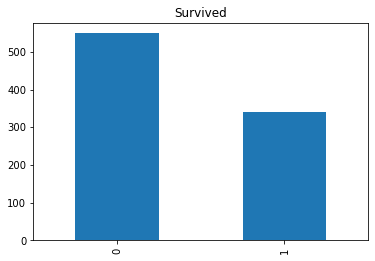

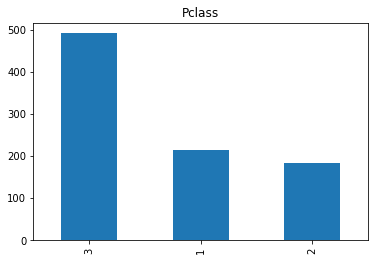

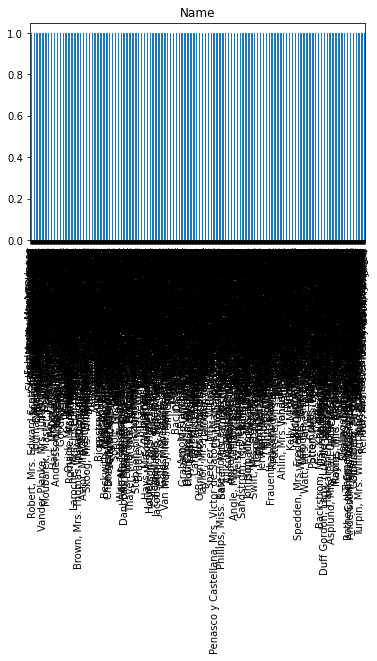

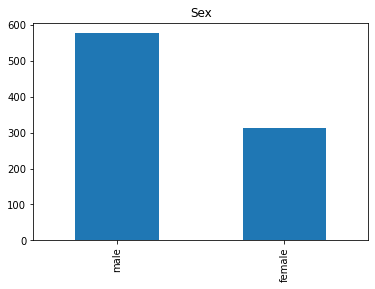

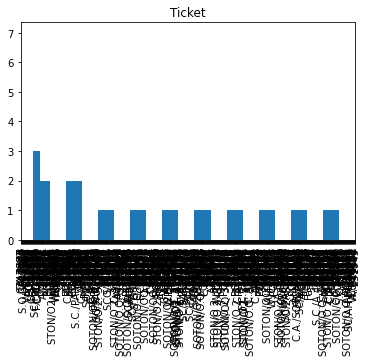

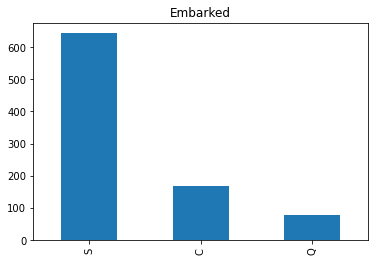

In [15]:
# value_counts(): 각 열에 들어있는 값의 개수를 카운트!

for j in titanic_object:
    df_titanic[j].value_counts().plot(kind='bar')
    plt.title(j)
    plt.show()

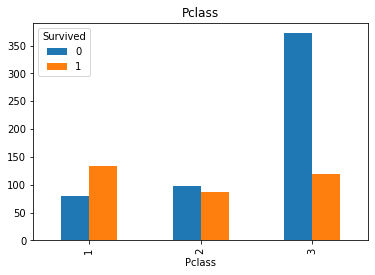

In [16]:
# Pclass에 따른 생존여부
# groupby().count(): 변수들을 그룹핑해준다음, 데이터 수를 카운트
# unstack(): row를 column으로 회전시키기
df_pclass = df_titanic.groupby(["Pclass", "Survived"])["Survived"].count().unstack("Survived")
df_pclass.plot(kind='bar')
plt.title("Pclass")
plt.show()

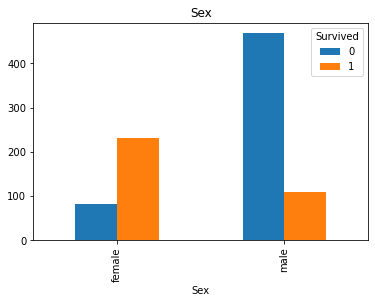

In [17]:
df_sex = df_titanic.groupby(["Sex", "Survived"])["Survived"].count().unstack("Survived")
df_sex.plot(kind='bar')
plt.title("Sex")
plt.show()

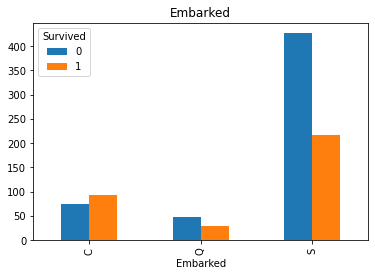

In [18]:
 
df_embarked = df_titanic.groupby(["Embarked", "Survived"])["Survived"].count().unstack("Survived")
df_embarked.plot(kind='bar')
plt.title("Embarked")
plt.show()

# 통계 지표

In [19]:
# 데이터의 개수를 세주는 count
# 평균을 구해주는 mean
# 중앙값을 구해주는 median
# 최빈값을 구해주는 mode

age_count = titanic['Age'].count()
age_mean = titanic['Age'].mean()
age_median = titanic['Age'].median()
age_mode = titanic['Age'].mode()

print(age_count)
print(age_mean)
print(age_median)
print(age_mode)

891
29.758888888888887
30.0
0    30.0
dtype: float64


In [20]:
# 최댓값
age_max = titanic['Age'].max()

# 최솟값
age_min = titanic['Age'].min()

# 범위
age_range = age_max - age_min

# 표준편차
age_std = titanic['Age'].std()

print(age_range)
print(age_std)

79.58
13.00257003982093


In [21]:
titanic.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.758889,0.523008,0.381594,32.204208
std,257.353842,13.002570,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,30.000000,0.000000,0.000000,14.454200
75%,668.500000,35.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 1.0, 'Age distribution by gender')

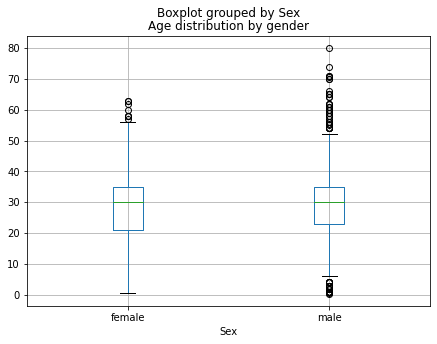

In [22]:
# 성별에 따른 나이의 분포
# 여성 나이 데이터의 중심은 20대 초~30대 중
# 남성 나이 데이터의 중심은 20대 중~30대 중, 대부분의 남성이 5세~50대 초 사이에 있어 그 이상,이하는 아웃라이어로 분류
# figsize는 그래프의 크기
titanic.boxplot(column="Age", by="Sex", figsize=(7,5))
plt.title("Age distribution by gender")

Text(0.5, 1.0, 'Scatterplot of Fare by Age')

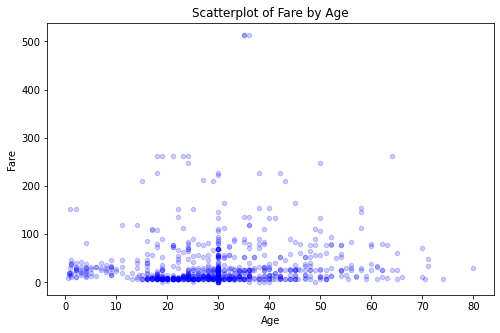

In [28]:
# 산점도, scatter plot
# 연령에 따른 요금 분포도
# alpha는 점의 크기
titanic.plot(kind='scatter', x="Age", y="Fare", figsize=(8,5), alpha=0.2, color="blue")
plt.title("Scatterplot of Fare by Age")
# 이상값도 확인 가능

# 상관관계

In [29]:
import seaborn as sns

In [24]:
titanic.corr()

,PassengerId,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.033019,-0.057527,-0.001652,0.012658
Age,0.033019,1.000000,-0.232440,-0.180330,0.090632
SibSp,-0.057527,-0.232440,1.000000,0.414838,0.159651
Parch,-0.001652,-0.180330,0.414838,1.000000,0.216225
Fare,0.012658,0.090632,0.159651,0.216225,1.000000


<AxesSubplot:>

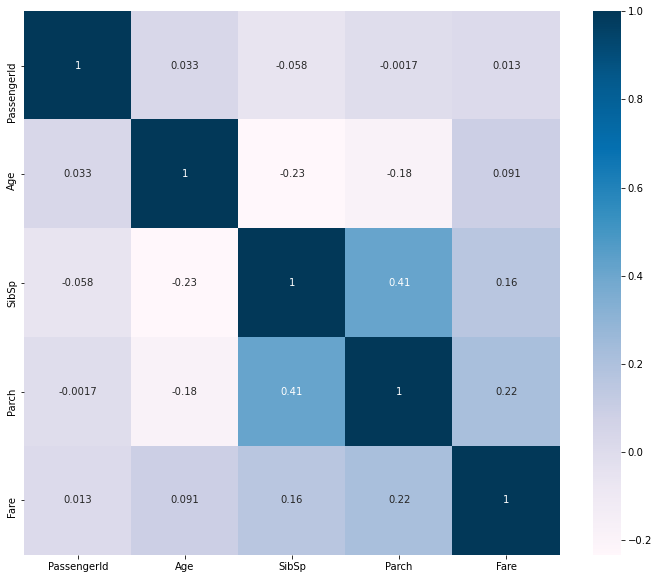

In [26]:
# annot= annotation: 상관계수를 표기함
plt.figure(figsize=(12,10))
sns.heatmap(titanic.corr(), cmap="PuBu", annot= True)